In [1]:

import numpy as np
import matplotlib.pyplot as plt
from BeliefLearningAgent import BeliefLearningAgent
from Game import Game
from scipy.interpolate import interp1d
import math

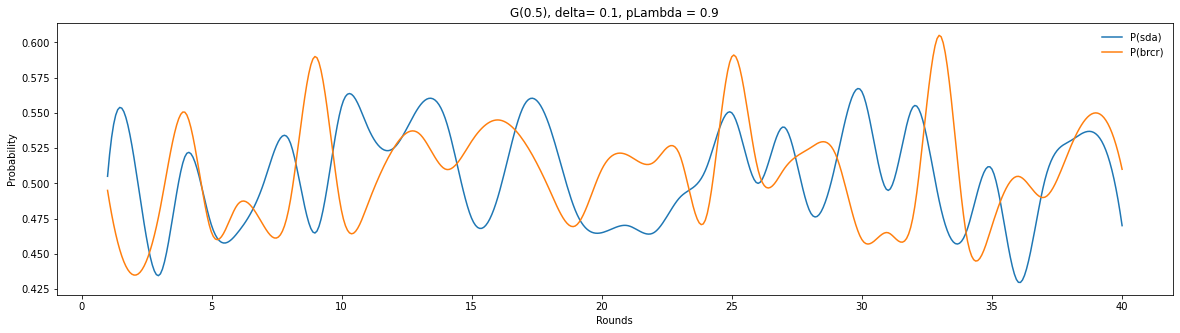

In [2]:
payOffLeft = [  [ [1,0], [0,1]] ,     
                [ [0,1], [0,1]] ]

payOffRight = [  [ [0,1], [0,1]] ,     
                [ [0,1], [1,0]] ]

sda = ['A', 'B']
brcr = ['B', 'A']

p = 0.5
delta= 0.1
pLambda = 0.9
p1 = BeliefLearningAgent(delta= delta, pLambda = pLambda, informed = True,
                 payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p)

p2 = BeliefLearningAgent(delta= delta, pLambda = pLambda, informed = False,
                 payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 200
av_payOff = []
avpsda = []
avpbrcr = []
psda = np.zeros(rounds)
pbrcr = np.zeros(rounds)
for ep in range(episodes):
    payoffs = []
    p1.reinit_belief()
    p2.reinit_belief()
    for i in range(rounds):
    
        p, p1action, p2action, selected = game.play_round()
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda[i]+=1
        if(p2action == brcr[selected]):
            pbrcr[i]+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
#     avpsda.append(psda/rounds)
#     avpbrcr.append(pbrcr/rounds)

#plt.plot(av_payOff)
avpsda = psda/episodes
avpbrcr = pbrcr/episodes
rnos=np.zeros(rounds)
for i in range(rounds):
    rnos[i] = i+1
 
cubic_interploation_model_sda = interp1d(rnos, avpsda, kind = "cubic")
# Plotting the Graph
X_=np.linspace(rnos.min(), rnos.max(), 500)
Y_Psda=cubic_interploation_model_sda(X_)

cubic_interploation_model_brcr = interp1d(rnos, avpbrcr, kind = "cubic")
# Plotting the Graph
Y_brcr=cubic_interploation_model_brcr(X_)

#plt.ylim(0.35 , 0.55)
plt.figure(figsize=(20,5))
plt.plot(X_, Y_Psda, label = "P(sda)")
plt.plot(X_, Y_brcr, label = "P(brcr)")
plt.title("G("+ str(0.5) + "), delta= " +str(delta)+", pLambda = "+str(pLambda))
plt.xlabel("Rounds")
plt.ylabel("Probability")
plt.legend(frameon=False)
plt.show()




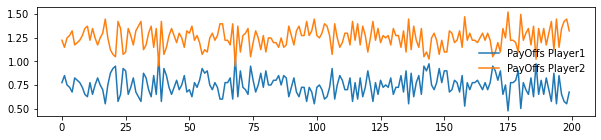

In [3]:
av_payOff = np.array(av_payOff)
plt.figure(figsize=(10,2))
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)


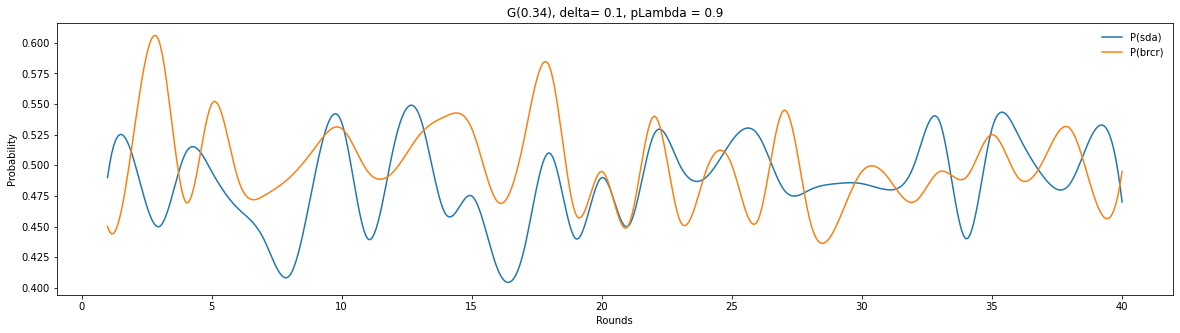

In [4]:
p = 0.34
delta= 0.1
pLambda = 0.9
p1 = BeliefLearningAgent(delta= delta, pLambda = pLambda, informed = True,
                 payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p)

p2 = BeliefLearningAgent(delta= delta, pLambda = pLambda, informed = False,
                 payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 200
av_payOff = []
avpsda = []
avpbrcr = []
psda = np.zeros(rounds)
pbrcr = np.zeros(rounds)
for ep in range(episodes):
    payoffs = []
    p1.reinit_belief()
    p2.reinit_belief()
    for i in range(rounds):
    
        p, p1action, p2action, selected = game.play_round()
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda[i]+=1
        if(p2action == brcr[selected]):
            pbrcr[i]+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
#     avpsda.append(psda/rounds)
#     avpbrcr.append(pbrcr/rounds)

#plt.plot(av_payOff)
avpsda = psda/episodes
avpbrcr = pbrcr/episodes
rnos=np.zeros(rounds)
for i in range(rounds):
    rnos[i] = i+1
 
cubic_interploation_model_sda = interp1d(rnos, avpsda, kind = "cubic")
# Plotting the Graph
X_=np.linspace(rnos.min(), rnos.max(), 500)
Y_Psda=cubic_interploation_model_sda(X_)

cubic_interploation_model_brcr = interp1d(rnos, avpbrcr, kind = "cubic")
# Plotting the Graph
Y_brcr=cubic_interploation_model_brcr(X_)

#plt.ylim(0.35 , 0.55)
plt.figure(figsize=(20,5))
plt.plot(X_, Y_Psda, label = "P(sda)")
plt.plot(X_, Y_brcr, label = "P(brcr)")
plt.title("G("+ str(0.34) + "), delta= " +str(delta)+", pLambda = "+str(pLambda))
plt.xlabel("Rounds")
plt.ylabel("Probability")
plt.legend(frameon=False)
plt.show()

Player 1 : Mean
0.888125
Player 2 : Mean
1.111875


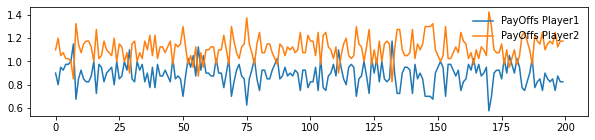

In [7]:
av_payOff = np.array(av_payOff)
plt.figure(figsize=(10,2))
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)

print("Player 1 : Mean")
print(np.mean(av_payOff[:,0]))
print("Player 2 : Mean")
print(np.mean(av_payOff[:,1]))


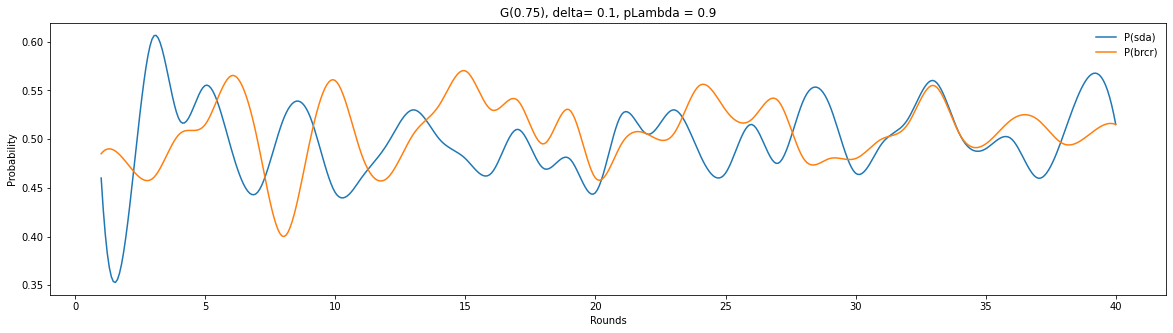

In [9]:
p = 0.75
delta= 0.1
pLambda = 0.9
p1 = BeliefLearningAgent(delta= delta, pLambda = pLambda, informed = True,
                 payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p)

p2 = BeliefLearningAgent(delta= delta, pLambda = pLambda, informed = False,
                 payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 200
av_payOff = []
avpsda = []
avpbrcr = []
psda = np.zeros(rounds)
pbrcr = np.zeros(rounds)
for ep in range(episodes):
    payoffs = []
    p1.reinit_belief()
    p2.reinit_belief()
    for i in range(rounds):
    
        p, p1action, p2action, selected = game.play_round()
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda[i]+=1
        if(p2action == brcr[selected]):
            pbrcr[i]+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
#     avpsda.append(psda/rounds)
#     avpbrcr.append(pbrcr/rounds)

#plt.plot(av_payOff)
avpsda = psda/episodes
avpbrcr = pbrcr/episodes
rnos=np.zeros(rounds)
for i in range(rounds):
    rnos[i] = i+1
 
cubic_interploation_model_sda = interp1d(rnos, avpsda, kind = "cubic")
# Plotting the Graph
X_=np.linspace(rnos.min(), rnos.max(), 500)
Y_Psda=cubic_interploation_model_sda(X_)

cubic_interploation_model_brcr = interp1d(rnos, avpbrcr, kind = "cubic")
# Plotting the Graph
Y_brcr=cubic_interploation_model_brcr(X_)

#plt.ylim(0.35 , 0.55)
plt.figure(figsize=(20,5))
plt.plot(X_, Y_Psda, label = "P(sda)")
plt.plot(X_, Y_brcr, label = "P(brcr)")
plt.title("G("+ str(0.75) + "), delta= " +str(delta)+", pLambda = "+str(pLambda))
plt.xlabel("Rounds")
plt.ylabel("Probability")
plt.legend(frameon=False)
plt.show()

Player 1 : Mean
0.8715
Player 2 : Mean
1.1284999999999998


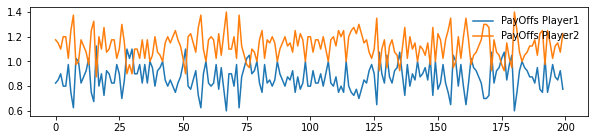

In [10]:
av_payOff = np.array(av_payOff)
plt.figure(figsize=(10,2))
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)
print("Player 1 : Mean")
print(np.mean(av_payOff[:,0]))
print("Player 2 : Mean")
print(np.mean(av_payOff[:,1]))